## EDA 


In [1]:
# Importando las librerias 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 
import warnings 
warnings.filterwarnings('ignore')
# Correccion
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, f1_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

from typing import List, Dict

1.- Importamos los datos.

In [2]:
DataCredit = pd.read_csv("credit_risk_data_v2.csv",low_memory=False)

In [3]:
DataCredit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10665 entries, 0 to 10664
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           10665 non-null  int64  
 1   member_id                    10665 non-null  int64  
 2   loan_amnt                    10665 non-null  int64  
 3   funded_amnt                  10665 non-null  int64  
 4   funded_amnt_inv              10665 non-null  float64
 5   term                         10665 non-null  object 
 6   int_rate                     10665 non-null  float64
 7   installment                  10665 non-null  float64
 8   grade                        10665 non-null  object 
 9   sub_grade                    10665 non-null  object 
 10  emp_title                    9970 non-null   object 
 11  emp_length                   10290 non-null  object 
 12  home_ownership               10665 non-null  object 
 13  annual_inc      

In [4]:
# Obtener una lista de las columnas que contienen solo valores en blanco
empty_columns = [col for col in DataCredit.columns if DataCredit[col].isnull().all()]
# Eliminar las columnas que contienen solo valores en blanco
DataCredit.drop(empty_columns, axis=1, inplace=True)
# Se borrran las columnas que son identificadores ya que no nos sirven para nuestros modelos 
DataCredit.drop(['id','member_id'],axis=1, inplace=True)
# btener una Serie con la cantidad de valores nulos en cada columna
null_counts = DataCredit.isnull().sum()
# Filtrar las columnas con valores nulos y ordenarlas de manera ascendente
null_cols = null_counts[null_counts > 0].sort_values()
# Imprimir las columnas con valores nulos
print(null_cols)

total_rec_int                     1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
last_credit_pull_d                1
last_pymnt_amnt                   1
collection_recovery_fee           1
recoveries                        1
total_rec_late_fee                1
acc_now_delinq                    1
total_rec_prncp                   1
status                            1
total_pymnt                       1
out_prncp_inv                     1
out_prncp                         1
initial_list_status               1
total_pymnt_inv                   1
revol_util                        3
last_pymnt_d                     17
emp_length                      375
emp_title                       695
desc                           4402
mths_since_last_delinq         7241
next_pymnt_d                   9612
mths_since_last_record        10173
dtype: int64


In [5]:
DataCredit.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,status
loan_amnt,1.000000,0.990083,0.986555,0.330167,0.940908,0.370353,0.030736,-0.040062,0.021722,0.020064,...,0.834993,0.731992,0.069724,0.156089,0.117688,0.451703,NaN,NaN,NaN,0.052035
funded_amnt,0.990083,1.000000,0.996685,0.326339,0.956507,0.369438,0.029705,-0.039399,0.025319,0.020773,...,0.845875,0.735433,0.069008,0.157442,0.118318,0.452994,NaN,NaN,NaN,0.050572
funded_amnt_inv,0.986555,0.996685,1.000000,0.325574,0.954960,0.367803,0.029705,-0.040570,0.028095,0.022684,...,0.843879,0.735247,0.069765,0.157697,0.118020,0.448758,NaN,NaN,NaN,0.050264
int_rate,0.330167,0.326339,0.325574,1.000000,0.288915,0.094083,0.089772,0.158994,0.192468,-0.099947,...,0.153192,0.552420,0.103837,0.149686,0.116536,0.168570,NaN,NaN,NaN,0.217732
installment,0.940908,0.956507,0.954960,0.288915,1.000000,0.381574,0.018940,-0.028420,0.026929,0.008241,...,0.840711,0.645129,0.074674,0.132259,0.098251,0.408395,NaN,NaN,NaN,0.027436
annual_inc,0.370353,0.369438,0.367803,0.094083,0.381574,1.000000,-0.169199,0.035412,0.039156,-0.031136,...,0.362370,0.256445,0.036958,0.027904,0.028612,0.203925,NaN,NaN,NaN,-0.065856
dti,0.030736,0.029705,0.029705,0.089772,0.018940,-0.169199,1.000000,-0.039704,0.021253,0.063771,...,-0.001386,0.078529,0.005362,0.028809,0.029834,-0.012894,NaN,NaN,NaN,0.047820
delinq_2yrs,-0.040062,-0.039399,-0.040570,0.158994,-0.028420,0.035412,-0.039704,1.000000,0.004733,-0.646246,...,-0.047466,0.031290,0.036154,0.010861,0.015156,-0.012975,NaN,NaN,NaN,0.029249
inq_last_6mths,0.021722,0.025319,0.028095,0.192468,0.026929,0.039156,0.021253,0.004733,1.000000,0.010248,...,-0.011107,0.044660,0.019279,0.027272,0.027722,0.046907,NaN,NaN,NaN,0.073356
mths_since_last_delinq,0.020064,0.020773,0.022684,-0.099947,0.008241,-0.031136,0.063771,-0.646246,0.010248,1.000000,...,0.017658,-0.029165,-0.037011,-0.003812,-0.009536,-0.002170,NaN,NaN,NaN,-0.003142


Despues de hacer el analisis de las variables o columnas que vamos a utilizar decidimos utilzar estas.

Variables bins
1. loan_amnt
2. int_rate
3. installment
4. emp_length
5. annual_incc
6.  dti
7. revol_bal
8. revol_util
9.  total_acc
10. total_pymnt
11. total_rec_prncp
12. total_rec_int
13. recoveris
14. last_pymnt_amnt

no bins
1. grade 
2. term 
3. home_ownership 
4. purpose
5. pymnt_plan
6. addr_state
7. initial_list_status
8. status

In [6]:
ListColumns = ['loan_amnt','int_rate','installment','emp_length',
               'annual_inc','dti','revol_bal','revol_util','total_acc',
               'total_pymnt','total_rec_prncp','total_rec_int','recoveries',
               'last_pymnt_amnt','grade','term','home_ownership','purpose',
               'pymnt_plan','addr_state','initial_list_status','status']
DataCredit_clean = DataCredit[ListColumns]

In [7]:
DataCredit_clean.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc,total_pymnt,total_rec_prncp,total_rec_int,recoveries,last_pymnt_amnt,status
count,10665.000000,10665.000000,10665.000000,1.066500e+04,10665.000000,10665.000000,10662.000000,10665.000000,10664.000000,10664.000000,10664.00000,10664.000000,10664.000000,10664.000000
mean,12825.002344,12.421012,363.011752,7.040254e+04,13.987993,13970.220159,52.352095,22.563526,13823.819908,10862.308177,2833.46169,127.021487,3317.972242,0.153695
std,8493.876716,4.246374,226.860644,4.913522e+04,6.640382,15227.767342,27.613719,11.136241,10212.941341,7880.070188,3265.11430,814.012722,5330.384198,0.360673
min,1000.000000,5.420000,21.740000,6.000000e+03,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,6000.000000,8.900000,191.280000,4.210000e+04,8.930000,4689.000000,30.600000,14.000000,6059.948582,5000.000000,734.49500,0.000000,275.912500,0.000000
50%,11100.000000,12.420000,322.070000,6.000000e+04,14.020000,10091.000000,54.600000,21.000000,11310.177450,9475.000000,1581.97500,0.000000,639.975000,0.000000
75%,17475.000000,15.620000,480.040000,8.500000e+04,19.170000,17809.000000,75.000000,29.000000,18650.890600,15000.000000,3649.68000,0.000000,4245.330000,0.000000
max,35000.000000,24.110000,1288.100000,1.782000e+06,29.930000,148804.000000,99.900000,79.000000,56809.051630,35000.020000,23062.45000,29623.350000,36115.200000,1.000000


# Visualizaciones

# Preprocessing

In [8]:
class ColumnSelectorTransformer:
    def __init__(self, columns: List[str]):
        self.columns = columns
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None) -> pd.DataFrame:
        return X.loc[:, self.columns]
    
    def fit(self, *args, **kwargs): 
        return self
    
    def __str__(self) -> str:
        return f"ColumnSelectorTransformer({self.columns})"
    
    def __repr__(self) -> str:
        return f"ColumnSelectorTransformer({self.columns})"
    

class BinningTransformer:
    def __init__(self, bins: Dict):
        self.bins = bins
        
    def __find_bin(self, value: float, mappings: List):
        for mapping in mappings:
            if value <= mapping["max"]:
                return mapping["label"]
        return "Error"
        
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None) -> pd.DataFrame:
        X = X.copy()
        for key in self.bins.keys():
            X.loc[:, key] = X.loc[:, key].transform(lambda x: self.__find_bin(x, self.bins[key]))
        return X

    def fit(self, *args, **kwargs):
        return self
    
    def __str__(self) -> str:
        return "BinningTransformer()"
    
    def __repr__(self) -> str:
        return "BinningTransformer()"

    
class WOETransformer:
    def __init__(self, columns: List[str], target_mappings: Dict = {0: "good", 1: "bad"}):
        self.target_mappings = target_mappings
        self.columns = columns
        self.woe_mappings = None
    
    def __get_absolute_odds(self, df: pd.DataFrame, col: str):
        key_first, key_second = list(self.target_mappings.keys())
        return (
            df.query(f"status=={key_first}")
            .groupby(col).size().reset_index()
            .rename(columns={0: self.target_mappings[key_first]})
            .set_index(col)
        ).join(
            df.query(f"status=={key_second}")
            .groupby(col).size().reset_index()
            .rename(columns={0: self.target_mappings[key_second]})
            .set_index(col)
        ).reset_index()[[col, "good", "bad"]]

    @staticmethod
    def __calculate_relative_odds(row: pd.Series, total_good: int, total_bad: int) -> pd.Series:
        return pd.Series(
            {
                **row.to_dict(),
                "good": row["good"] / total_good,
                "bad": row["bad"] / total_bad
            }
        )

    def __get_odds(self, df: pd.DataFrame, col: str,
                   absolute_values: bool = False) -> pd.DataFrame:
        key_first, key_second = list(self.target_mappings.keys())
        odds_absolute = self.__get_absolute_odds(df, col)

        if absolute_values:
            return odds_absolute

        # Relative Odds
        total_good = odds_absolute["good"].sum()
        total_bad = odds_absolute["bad"].sum()
        return odds_absolute.apply(
            lambda row: WOETransformer.__calculate_relative_odds(row, total_good, total_bad),
            axis=1
        )

    @staticmethod
    def __calculate_woe(row: pd.Series) -> pd.Series:
        return pd.Series(
            {
                **row.to_dict(),
                "woe": np.log(row["good"] / row["bad"]),
                "info_val": (row["good"] - row["bad"]) * np.log(row["good"] / row["bad"])
            }
        )

    def __set_woe_mappings(self, X: pd.DataFrame, y: pd.Series,
                           absolute_values: bool = False) -> None:
        df = X.copy()
        df["status"] = y
        
        self.woe_mappings = {
            col: self.__get_odds(df, col, absolute_values)\
                .apply(lambda row: WOETransformer.__calculate_woe(row), axis=1)\
                .sort_values(by="woe", axis=0, ascending=True)
            for col in self.columns
        }
        
    def fit(self, X: pd.DataFrame, y: pd.DataFrame, *args, **kwargs):
        self.__set_woe_mappings(X, y, *args, **kwargs)
        return self
    
    def transform(self, X: pd.DataFrame, y: pd.DataFrame = None) -> pd.DataFrame:
        if self.woe_mappings is None:
            raise NotFittedError(f"This {self} instance is not fitted yet. Call 'fit' with appropriate arguments before using this transformer.")
        df = X.copy()
        out = pd.DataFrame([])
        for col in df.columns:
            mapping = self.woe_mappings[col].set_index(col)
            categories = list(mapping.index)
            out[col] = df.loc[:, col].apply(lambda cat: mapping.loc[cat, "woe"])
        return out
    
    def __str__(self) -> str:
        return f"WOETransformer(columns={self.columns}, target_mappings={self.target_mappings})"
    
    def __repr__(self) -> str:
        return f"WOETransformer(columns={self.columns}, target_mappings={self.target_mappings})"

In [9]:
from Bins import bins

In [10]:
x_train = DataCredit.drop('status', axis=1)
y_train = DataCredit['status']

cols_to_keep = ['loan_amnt','int_rate','installment','emp_length',
               'annual_inc','dti','revol_bal','revol_util','total_acc',
               'total_pymnt','total_rec_prncp','total_rec_int','recoveries',
               'last_pymnt_amnt','grade','term','home_ownership','purpose',
               'pymnt_plan','addr_state','initial_list_status']

# Transformations

In [11]:
column_t = ColumnSelectorTransformer(columns=cols_to_keep)
binning_t = BinningTransformer(bins=bins)
woe_t = WOETransformer(columns=cols_to_keep)

In [12]:
x_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,...,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1.0,INDIVIDUAL,0.0
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,...,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,1.0,INDIVIDUAL,0.0
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,1.0,INDIVIDUAL,0.0
4,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,...,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,1.0,INDIVIDUAL,0.0


In [13]:
x_train_c = column_t.transform(x_train)
x_train_c.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,total_pymnt,...,total_rec_int,recoveries,last_pymnt_amnt,grade,term,home_ownership,purpose,pymnt_plan,addr_state,initial_list_status
0,5000,10.65,162.87,10+ years,24000.0,27.65,13648,83.7,9.0,5861.071414,...,861.07,0.00,171.62,B,36 months,RENT,credit_card,n,AZ,f
1,2500,15.27,59.83,< 1 year,30000.0,1.00,1687,9.4,4.0,1008.710000,...,435.17,117.08,119.66,C,60 months,RENT,car,n,GA,f
2,2400,15.96,84.33,10+ years,12252.0,8.72,2956,98.5,10.0,3003.653644,...,603.65,0.00,649.91,C,36 months,RENT,small_business,n,IL,f
3,10000,13.49,339.31,10+ years,49200.0,20.00,5598,21.0,37.0,12226.302210,...,2209.33,0.00,357.48,C,36 months,RENT,other,n,CA,f
4,3000,12.69,67.79,1 year,80000.0,17.94,27783,53.9,38.0,3242.170000,...,1009.07,0.00,67.79,B,60 months,RENT,other,n,OR,f


In [14]:
x_train_b = binning_t.transform(x_train_c)
x_train_b.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,revol_bal,revol_util,total_acc,total_pymnt,...,total_rec_int,recoveries,last_pymnt_amnt,grade,term,home_ownership,purpose,pymnt_plan,addr_state,initial_list_status
0,"(2000, 8000)","(9, 11)","(100, 250)",10+ years,"(3.896000e+03, 4.500000e+04)","(23, 30)","(1.176400e+04, 1.623020e+04)","(75, 600)","(7, 17)","(5500, 9500)",...,"(-inf, 1200)","(-inf, 200)","(-inf, 400)",B,36 months,RENT,credit_card,n,AZ,f
1,"(2000, 8000)","(15, 17)","(-inf, 100)",< 1 year,"(3.896000e+03, 4.500000e+04)","(-inf, 14)","(-inf, 10.413000e+03)","(-inf, 42)","(-inf, 7)","(-inf, 5500)",...,"(-inf, 1200)","(-inf, 200)","(-inf, 400)",C,60 months,RENT,car,n,GA,f
2,"(2000, 8000)","(15, 17)","(-inf, 100)",10+ years,"(3.896000e+03, 4.500000e+04)","(-inf, 14)","(-inf, 10.413000e+03)","(75, 600)","(7, 17)","(-inf, 5500)",...,"(-inf, 1200)","(-inf, 200)","(550, 2000)",C,36 months,RENT,small_business,n,IL,f
3,"(8000, 12000)","(13, 15)","(250, 380)",10+ years,"(4.500000e+04, 6.300000e+04)","(18, 23)","(-inf, 10.413000e+03)","(-inf, 42)","(35, 100)","(11000, 15000)",...,"(1800, 2500)","(-inf, 200)","(-inf, 400)",C,36 months,RENT,other,n,CA,f
4,"(2000, 8000)","(11, 13)","(-inf, 100)",1 year,"(7.327738e+04, 8.896000e+04)","(16, 18)","(2.033300e+04\t, 1.568995e+06)","(48, 56)","(35, 100)","(-inf, 5500)",...,"(-inf, 1200)","(-inf, 200)","(-inf, 400)",B,60 months,RENT,other,n,OR,f


In [15]:
woe_t.fit(x_train_b, y_train)

WOETransformer(columns=['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_amnt', 'grade', 'term', 'home_ownership', 'purpose', 'pymnt_plan', 'addr_state', 'initial_list_status'], target_mappings={0: 'good', 1: 'bad'})

In [40]:
woe_t.transform(x_train_b).head()

KeyError: nan

# WOE

In [19]:
woe_t.woe_mappings['loan_amnt']

,loan_amnt,good,bad,woe,info_val
5,"(30000, inf)",0.043435,0.068944,-0.462038,0.011786
4,"(20000, 30000)",0.119114,0.139109,-0.155182,0.003103
2,"(14400, 20000)",0.172853,0.200122,-0.146485,0.003994
1,"(12000, 14400)",0.072244,0.073826,-0.021658,0.000034
0,"(-inf, 2000)",0.032687,0.031117,0.049238,0.000077
3,"(2000, 8000)",0.346260,0.310555,0.108829,0.003886
6,"(8000, 12000)",0.213407,0.176327,0.190862,0.007077


In [20]:
woe_t.woe_mappings['int_rate']

,int_rate,good,bad,woe,info_val
5,"(23, inf)",0.002770,0.007932,-1.051986,0.005430
4,"(17, 23)",0.135512,0.309335,-0.825361,0.143466
3,"(15, 17)",0.101717,0.151922,-0.401168,0.020140
2,"(13, 15)",0.120886,0.137889,-0.131597,0.002237
1,"(11, 13)",0.199557,0.179378,0.106605,0.002151
6,"(9, 11)",0.136399,0.081757,0.511830,0.027967
0,"(-inf, 9)",0.303158,0.131788,0.833062,0.142762


In [21]:
woe_t.woe_mappings['installment']

,installment,good,bad,woe,info_val
5,"(430, 570)",0.144488,0.169616,-0.160342,0.004029
6,"(570, 1000)",0.145042,0.164735,-0.127315,0.002507
4,"(380, 430)",0.071579,0.078096,-0.087143,0.000568
0,"(-inf, 100)",0.079335,0.078096,0.015738,0.000019
3,"(250, 380)",0.257396,0.244051,0.053238,0.000710
1,"(100, 250)",0.287978,0.255644,0.119099,0.003851
2,"(1000, inf)",0.014183,0.009762,0.373529,0.001651


In [22]:
woe_t.woe_mappings['emp_length']

,emp_length,good,bad,woe,info_val
0,1 year,0.073238,0.082481,-0.118854,0.001099
10,< 1 year,0.092149,0.101023,-0.091942,0.000816
8,8 years,0.039312,0.041560,-0.055603,0.000125
1,10+ years,0.264183,0.277494,-0.049154,0.000654
3,3 years,0.092951,0.095908,-0.031313,0.000093
6,6 years,0.070716,0.070332,0.005443,0.000002
5,5 years,0.088940,0.087596,0.015226,0.000020
4,4 years,0.089169,0.081841,0.085750,0.000628
2,2 years,0.103152,0.092072,0.113636,0.001259
7,7 years,0.054212,0.044757,0.191654,0.001812


In [23]:
woe_t.woe_mappings['annual_inc']

,annual_inc,good,bad,woe,info_val
0,"(3.896000e+03, 4.500000e+04)",0.278116,0.362416,-0.264753,0.022319
1,"(4.500000e+04, 6.300000e+04)",0.246537,0.263575,-0.066826,0.001139
3,"(7.327738e+04, 8.896000e+04)",0.127756,0.120195,0.061007,0.000461
2,"(6.300000e+04, 7.327738e+04)",0.112576,0.101281,0.105729,0.001194
4,"(8.896000e+04, 2.500000e+06)",0.235014,0.152532,0.432270,0.035654


In [24]:
woe_t.woe_mappings['dti']

,dti,good,bad,woe,info_val
3,"(18, 23)",0.208421,0.243441,-0.155315,5.439135e-03
4,"(23, 30)",0.090970,0.103722,-0.131188,1.672937e-03
2,"(16, 18)",0.095069,0.100671,-0.057254,3.207282e-04
1,"(14, 16)",0.097618,0.097621,-0.000028,7.870105e-11
0,"(-inf, 14)",0.507922,0.454545,0.111031,5.926491e-03


In [25]:
woe_t.woe_mappings['revol_bal']

,revol_bal,good,bad,woe,info_val
3,"(10.413000e+03, 1.176400e+04)",0.053629,0.057962,-0.077704,0.000337
2,"(1.623020e+04, 2.033300e+04\t)",0.087645,0.092739,-0.056495,0.000288
1,"(1.176400e+04, 1.623020e+04)",0.141828,0.147651,-0.040235,0.000234
0,"(-inf, 10.413000e+03)",0.515235,0.507016,0.016080,0.000132
4,"(2.033300e+04\t, 1.568995e+06)",0.201662,0.194631,0.035488,0.000250


In [26]:
woe_t.woe_mappings['revol_util']

,revol_util,good,bad,woe,info_val
5,Error,0.000222,0.000610,-1.012765,0.000393
4,"(75, 600)",0.233463,0.334960,-0.360990,0.036640
3,"(56, 75)",0.229917,0.255644,-0.106067,0.002729
1,"(42, 48)",0.062936,0.059182,0.061498,0.000231
2,"(48, 56)",0.093850,0.072605,0.256665,0.005453
0,"(-inf, 42)",0.379612,0.276998,0.315139,0.032338


In [27]:
woe_t.woe_mappings['total_acc']

,total_acc,good,bad,woe,info_val
0,"(-inf, 7)",0.047424,0.069555,-0.382987,0.008476
5,"(7, 17)",0.318227,0.348383,-0.090537,0.002730
2,"(22, 25)",0.098061,0.093350,0.049238,0.000232
3,"(25, 35)",0.222271,0.211104,0.051547,0.000576
4,"(35, 100)",0.130194,0.119585,0.084997,0.000902
1,"(17, 22)",0.183823,0.158023,0.151230,0.003902


In [28]:
woe_t.woe_mappings['total_pymnt']

,total_pymnt,good,bad,woe,info_val
0,"(-inf, 5500)",0.160443,0.489933,-1.116328,3.678187e-01
4,"(5500, 9500)",0.213961,0.214155,-0.000905,1.753753e-07
5,"(9500, 11000)",0.061939,0.054301,0.131601,1.005122e-03
1,"(11000, 15000)",0.168421,0.097621,0.545380,3.861318e-02
2,"(15000, 40000)",0.363878,0.140940,0.948488,2.114544e-01
3,"(40000, inf)",0.031357,0.003051,2.330097,6.595735e-02


In [29]:
woe_t.woe_mappings['total_rec_prncp']

,total_rec_prncp,good,bad,woe,info_val
0,"(-inf, 3700)",0.107036,0.577181,-1.684991,0.792190
3,"(3700, 6800)",0.189695,0.225137,-0.171291,0.006071
4,"(6800, 8800)",0.105596,0.065284,0.480874,0.019385
5,"(8800, 12000)",0.213407,0.072605,1.078165,0.151808
1,"(12000, 25000)",0.312244,0.055522,1.727011,0.443362
2,"(25000, inf)",0.072022,0.004271,2.825150,0.191407


In [30]:
woe_t.woe_mappings['total_rec_int']

,total_rec_int,good,bad,woe,info_val
4,"(2500, 3300)",0.078006,0.088469,-0.125868,1.316957e-03
5,"(3300, 10000)",0.223823,0.251983,-0.118507,3.337181e-03
3,"(1800, 2500)",0.107590,0.107383,0.001930,4.004871e-07
0,"(-inf, 1200)",0.413629,0.401464,0.029850,3.631145e-04
2,"(1200, 1800)",0.129640,0.114704,0.122405,1.828215e-03
1,"(10000, inf)",0.047313,0.035998,0.273334,3.092904e-03


In [31]:
woe_t.woe_mappings['recoveries']

,recoveries,good,bad,woe,info_val
0,"(-inf, 200)",1.0,1.0,0.0,0.0


In [32]:
woe_t.woe_mappings['last_pymnt_amnt']

,last_pymnt_amnt,good,bad,woe,info_val
0,"(-inf, 400)",0.318781,0.674192,-0.749009,0.266206
4,"(400, 550)",0.082105,0.148871,-0.595080,0.039731
5,"(550, 2000)",0.183823,0.172056,0.066151,0.000778
2,"(2000, 3200)",0.067701,0.001220,4.016038,0.266988
3,"(3200, 10000)",0.220720,0.003051,4.281544,0.931962
1,"(10000, inf)",0.126870,0.000610,5.337248,0.673879


In [33]:
woe_t.woe_mappings['grade']

,grade,good,bad,woe,info_val
6,G,0.005208,0.017694,-1.223060,0.015271
5,F,0.021496,0.070165,-1.182986,0.057575
4,E,0.062161,0.132398,-0.756089,0.053106
3,D,0.112022,0.190360,-0.530220,0.041536
2,C,0.175734,0.208054,-0.168824,0.005456
1,B,0.320332,0.249542,0.249730,0.017678
0,A,0.303047,0.131788,0.832696,0.142607


In [34]:
woe_t.woe_mappings['term']

,term,good,bad,woe,info_val
1,60 months,0.303712,0.511897,-0.522045,0.108682
0,36 months,0.696288,0.488103,0.355238,0.073955


In [35]:
woe_t.woe_mappings['home_ownership']

,home_ownership,good,bad,woe,info_val
2,RENT,0.450083,0.516779,-0.138182,0.009216
1,OWN,0.074681,0.071995,0.036633,0.000098
0,MORTGAGE,0.475235,0.411226,0.144667,0.009260


In [36]:
woe_t.woe_mappings['purpose']

,purpose,good,bad,woe,info_val
10,small_business,0.038670,0.073826,-0.646631,0.022732
7,moving,0.012299,0.017694,-0.363678,0.001962
6,medical,0.016399,0.021354,-0.264048,0.001309
8,other,0.084321,0.104332,-0.212942,0.004261
2,debt_consolidation,0.508255,0.545455,-0.070636,0.002628
4,house,0.010859,0.010982,-0.011316,0.000001
0,car,0.030914,0.025625,0.187630,0.000992
9,renewable_energy,0.002327,0.001830,0.239998,0.000119
1,credit_card,0.154681,0.111653,0.325968,0.014026
12,wedding,0.022493,0.015863,0.349197,0.002315


In [37]:
woe_t.woe_mappings['pymnt_plan']

,pymnt_plan,good,bad,woe,info_val
0,n,1.0,1.0,0.0,0.0


In [38]:
woe_t.woe_mappings['addr_state']

,addr_state,good,bad,woe,info_val
0,AK,0.002105,0.004881,-0.840915,2.334179e-03
35,SD,0.001994,0.003661,-0.607300,1.011949e-03
27,NV,0.011745,0.020134,-0.538981,4.521550e-03
26,NM,0.003767,0.006101,-0.482137,1.125292e-03
33,RI,0.004543,0.006711,-0.390235,8.462150e-04
18,MI,0.014404,0.020744,-0.364738,2.312413e-03
17,MD,0.023158,0.031117,-0.295404,2.351011e-03
1,AL,0.010305,0.013423,-0.264355,8.242884e-04
31,OR,0.011413,0.014643,-0.249237,8.051186e-04
39,VA,0.029695,0.037218,-0.225799,1.698579e-03


In [39]:
woe_t.woe_mappings['initial_list_status']

,initial_list_status,good,bad,woe,info_val
0,f,1.0,1.0,0.0,0.0


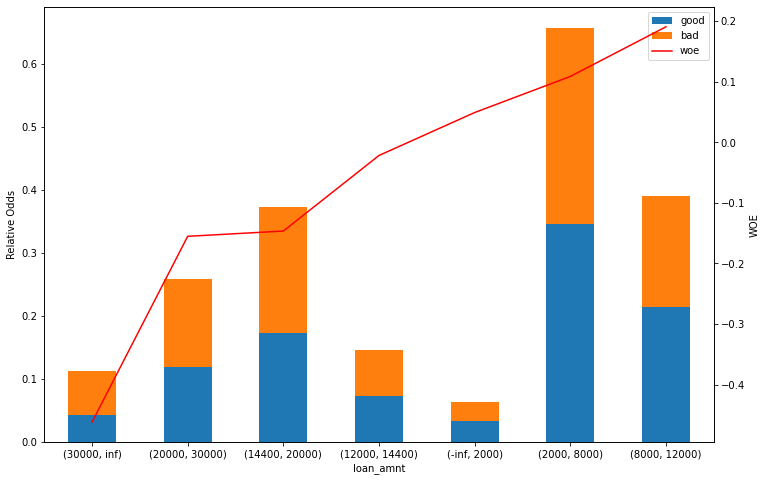

In [41]:
ax = woe_t.woe_mappings["loan_amnt"].plot.bar(
    x="loan_amnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["loan_amnt"].plot(
    x="loan_amnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

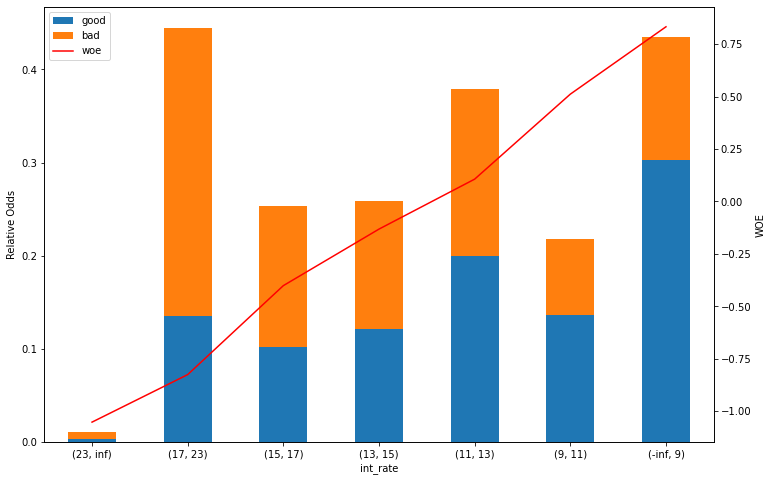

In [42]:
ax = woe_t.woe_mappings["int_rate"].plot.bar(
    x="int_rate", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["int_rate"].plot(
    x="int_rate", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

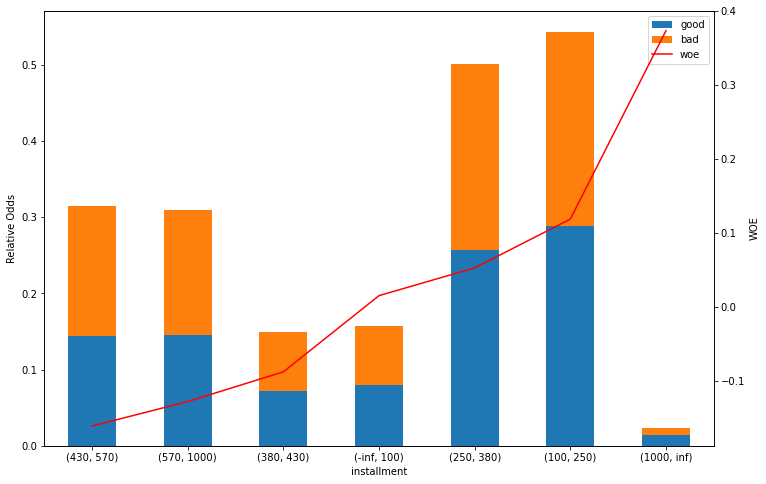

In [43]:
ax = woe_t.woe_mappings["installment"].plot.bar(
    x="installment", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["installment"].plot(
    x="installment", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

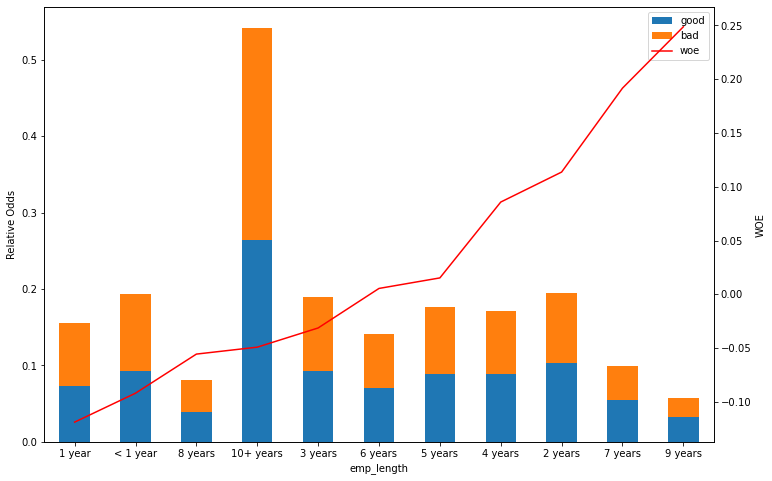

In [44]:
ax = woe_t.woe_mappings["emp_length"].plot.bar(
    x="emp_length", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["emp_length"].plot(
    x="emp_length", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

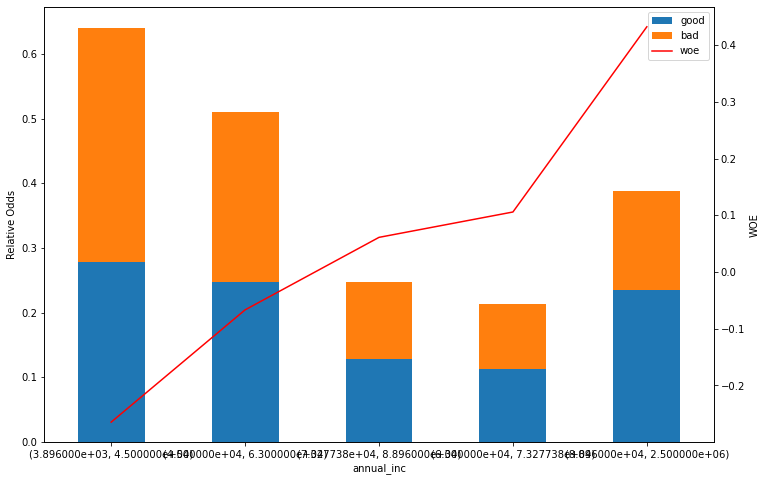

In [45]:
ax = woe_t.woe_mappings["annual_inc"].plot.bar(
    x="annual_inc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["annual_inc"].plot(
    x="annual_inc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

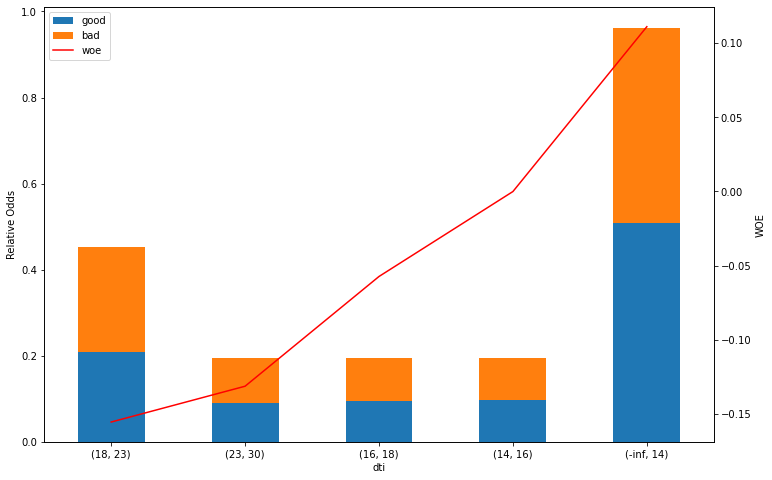

In [46]:
ax = woe_t.woe_mappings["dti"].plot.bar(
    x="dti", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["dti"].plot(
    x="dti", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

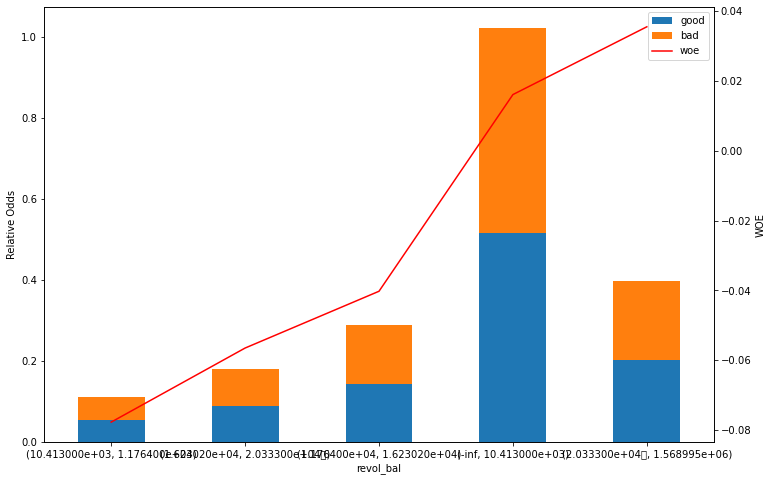

In [47]:
ax = woe_t.woe_mappings["revol_bal"].plot.bar(
    x="revol_bal", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["revol_bal"].plot(
    x="revol_bal", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

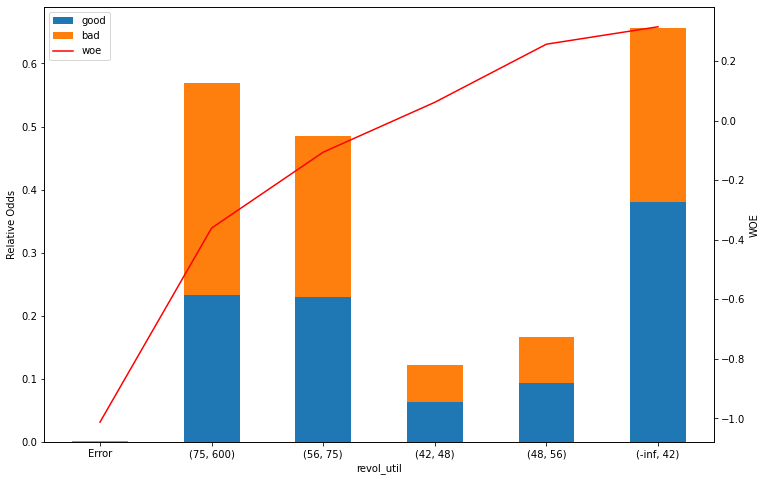

In [48]:
ax = woe_t.woe_mappings["revol_util"].plot.bar(
    x="revol_util", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["revol_util"].plot(
    x="revol_util", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

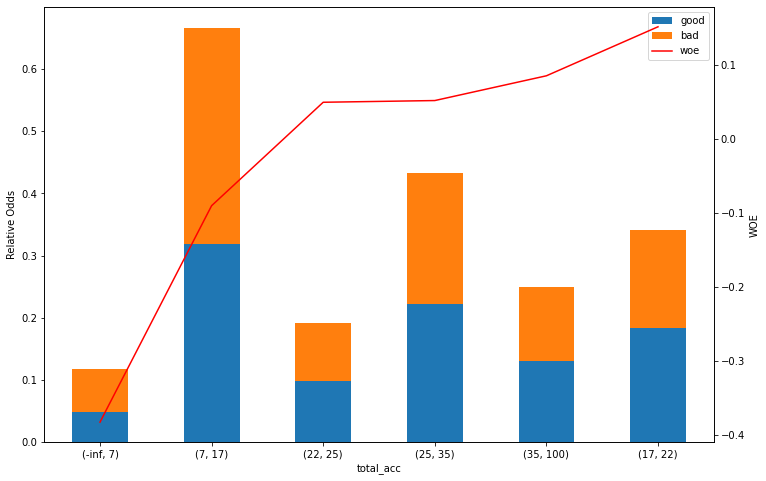

In [49]:
ax = woe_t.woe_mappings["total_acc"].plot.bar(
    x="total_acc", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_acc"].plot(
    x="total_acc", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

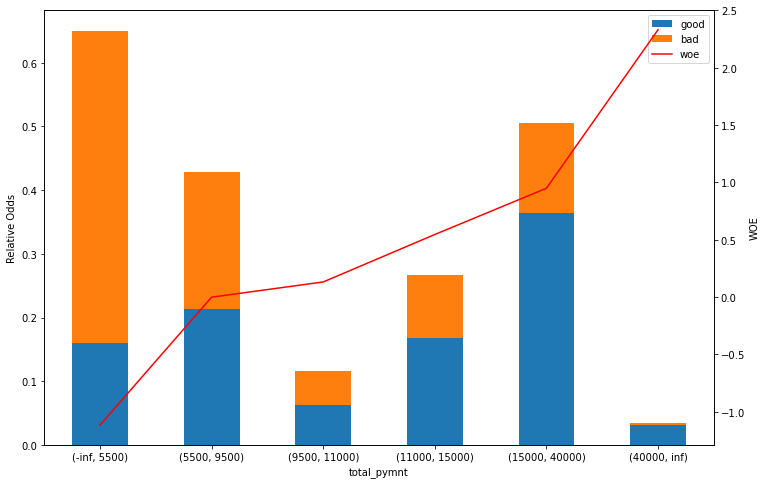

In [50]:
ax = woe_t.woe_mappings["total_pymnt"].plot.bar(
    x="total_pymnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_pymnt"].plot(
    x="total_pymnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

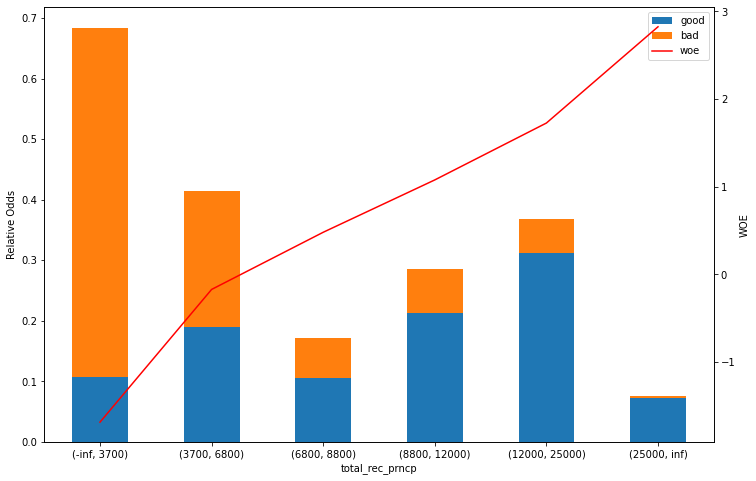

In [51]:
ax = woe_t.woe_mappings["total_rec_prncp"].plot.bar(
    x="total_rec_prncp", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_rec_prncp"].plot(
    x="total_rec_prncp", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

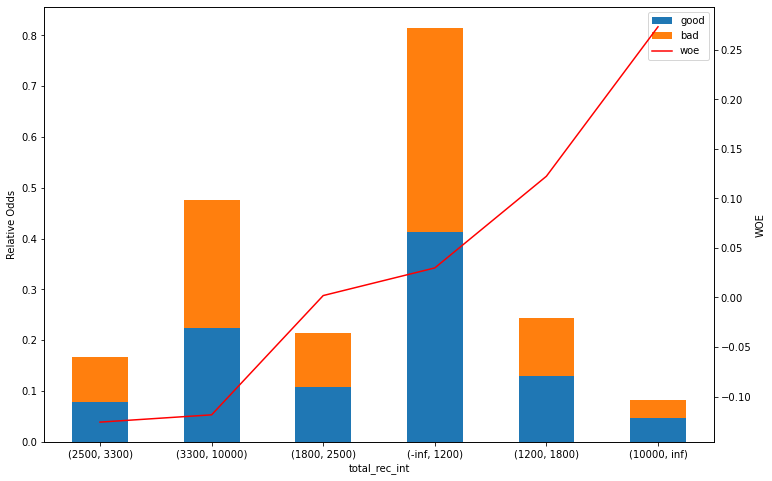

In [52]:
ax = woe_t.woe_mappings["total_rec_int"].plot.bar(
    x="total_rec_int", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_rec_int"].plot(
    x="total_rec_int", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

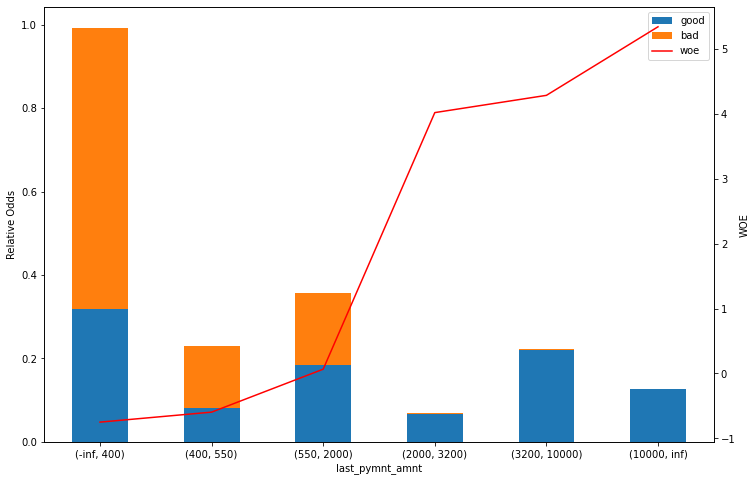

In [54]:
ax = woe_t.woe_mappings["last_pymnt_amnt"].plot.bar(
    x="last_pymnt_amnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["last_pymnt_amnt"].plot(
    x="last_pymnt_amnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

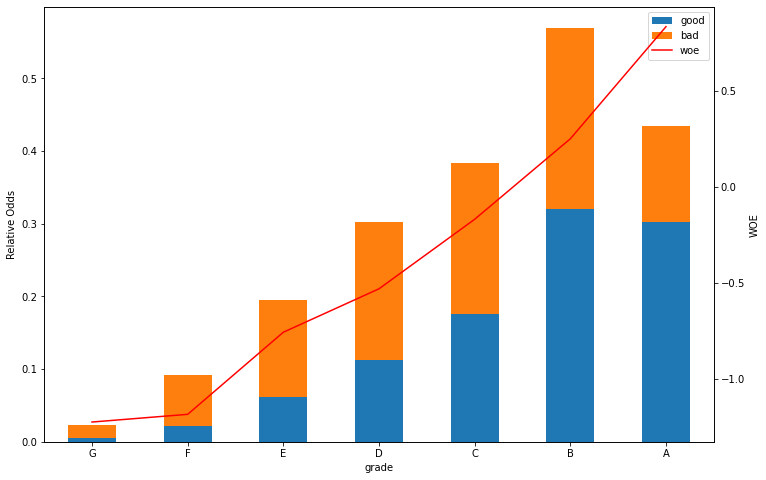

In [55]:
ax = woe_t.woe_mappings["grade"].plot.bar(
    x="grade", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["grade"].plot(
    x="grade", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

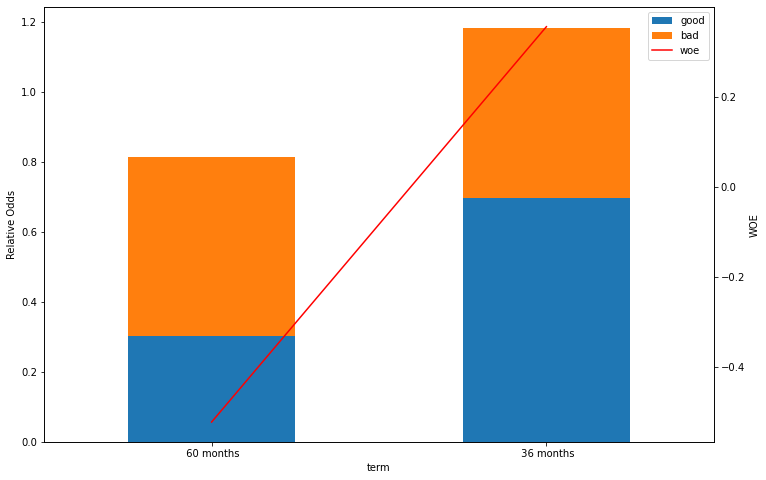

In [56]:
ax = woe_t.woe_mappings["term"].plot.bar(
    x="term", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["term"].plot(
    x="term", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

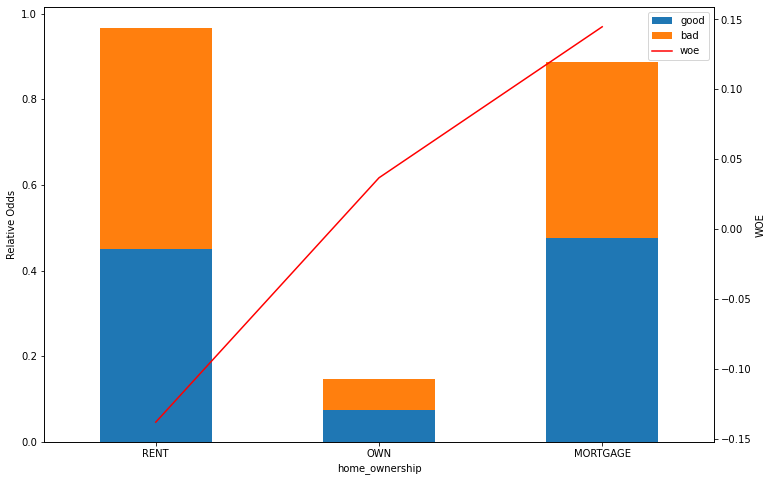

In [57]:
ax = woe_t.woe_mappings["home_ownership"].plot.bar(
    x="home_ownership", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["home_ownership"].plot(
    x="home_ownership", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

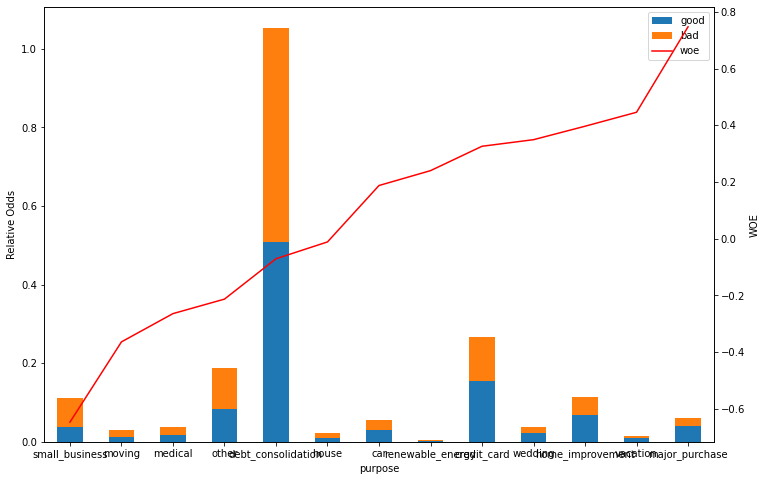

In [58]:
ax = woe_t.woe_mappings["purpose"].plot.bar(
    x="purpose", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["purpose"].plot(
    x="purpose", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

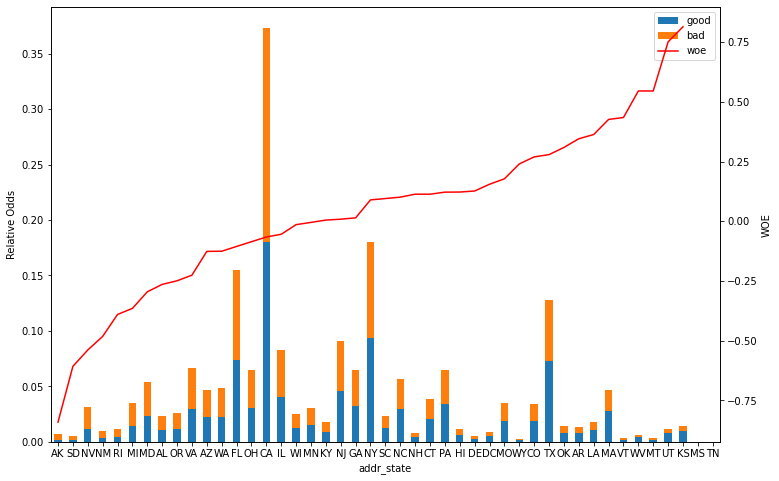

In [60]:
ax = woe_t.woe_mappings["addr_state"].plot.bar(
    x="addr_state", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["addr_state"].plot(
    x="addr_state", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

# Pipelines

In [63]:
seed = 0

In [64]:
ml_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=cols_to_keep)),
    ('bins', BinningTransformer(bins=bins)),
    ('woe', WOETransformer(columns=cols_to_keep)),
    # ('logistic regression', LogisticRegression(random_state=seed))
    ('gdbt', GradientBoostingClassifier(random_state=seed))
])

## Target Variable

In [69]:
y_train_nd = [1 if val==0 else 0 for val in y_train.values]

In [66]:
ml_pipe.fit(x_train, y_train_nd)

KeyError: nan

In [67]:
ml_pipe.score(x_train, y_train_nd)

KeyError: nan

In [70]:
ml_pipe.predict_proba(x_train)

KeyError: nan

In [71]:
y_pred = ml_pipe.predict(x_train)

KeyError: nan

In [ ]:
fpr, tpr, threshold = roc_curve(y_train_nd, ml_pipe.predict_proba(x_train)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_train_nd, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()